In [1]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
videos = pd.read_csv('../data/moded/DE_videos_outliers.csv', sep='\t')

In [3]:
videos.head()

,Unnamed: 0,X,video_id,trending_date,title,channel_title,publish_time,tags,views,likes,...,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,state,lat,lon,geometry,snippet.title
0,1,0,LgVi6y5QIjM,2017-11-14,Sing zu Ende! | Gesangseinlagen vom Feinsten |...,inscope21,2017-11-13 17:08:49+00:00,"inscope21|\sing zu ende\""|\""gesangseinlagen\""|...",252786.0,90818.25,...,https://i.ytimg.com/vi/LgVi6y5QIjM/default.jpg,False,False,False,Heute gibt es mal wieder ein neues Format... w...,Schleswig Holstein,54.783748,9.433315,POINT (9.433315388 54.78374778),Entertainment
1,2,1,1ZAPwfrtAFY,2017-11-14,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,2017-11-13 07:30:00+00:00,last week tonight trump presidency|\last week ...,2279441.9,90818.25,...,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",Saarland,49.250390,6.970003,POINT (6.970003213 49.25039044),Entertainment
2,3,2,ZJ9We4bjcg0,2017-11-14,18 SONGS mit Kelly MissesVlog (Sing-off),rezo,2017-11-12 13:10:36+00:00,"kelly|\missesvlog\""|\""kelly song\""|\""bausa\""|\...",822213.0,90818.25,...,https://i.ytimg.com/vi/ZJ9We4bjcg0/default.jpg,False,False,False,18 Song Mashup über den (veränderten) Beat von...,Berlin,52.521819,13.401549,POINT (13.40154862 52.52181866),Entertainment
3,4,3,2hu_evXPpMM,2017-11-14,Dagi Bee wird Heiraten | Coldmirror bekommt Eh...,HerrNewstime,2017-11-12 16:33:18+00:00,"Dagi Bee|\Heiraten\""|\""Coldmirror\""|\""YouTube\...",228574.0,11349.00,...,https://i.ytimg.com/vi/2hu_evXPpMM/default.jpg,False,False,False,Dagi Bee wird Heiraten | Coldmirror bekommt Eh...,Thuringen,50.970053,11.029962,POINT (11.02996212 50.97005292),Entertainment
4,5,4,OKYUtHvgMhc,2017-11-14,Die Welt in 30 Jahren - Sommer 2047 - VOLKAN,VOLKAN,2017-11-12 16:09:44+00:00,"Welt|\Natur\""|\""Umwelt\""|\""Klima\""|\""Klimawand...",37877.0,1839.00,...,https://i.ytimg.com/vi/OKYUtHvgMhc/default.jpg,False,False,False,"Über die Zukunft nachzudenken macht Spaß, oder...",Sachsen,50.829984,12.919976,POINT (12.91997595 50.82998395),Entertainment


In [55]:
X = videos[['likes', 'dislikes', 'comment_count']]
y = videos['views']

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=2000, random_state=101)

In [57]:
from sklearn.linear_model import LinearRegression

In [58]:
lm = LinearRegression()

In [59]:
lm.fit(X_train,y_train)

LinearRegression()

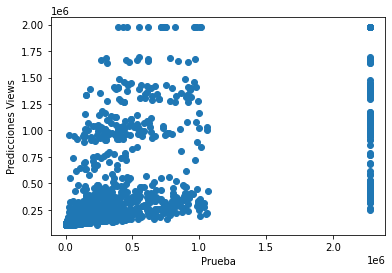

In [61]:
preds = lm.predict(X_test)
plt.scatter(y_test, preds)
plt.xlabel('Prueba')
plt.ylabel('Predicciones Views')
plt.show()

In [62]:
slope = lm.coef_  # w1
intercept = lm.intercept_ # w0

print("Las pendientes 'w1' del modelo son: ", slope)
print("El término independiente de la recta 'w0' es: ", intercept)

Las pendientes 'w1' del modelo son:  [  7.85688829 168.81791457  34.57047452]
El término independiente de la recta 'w0' es:  108124.36654993135


In [63]:
coef_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coeficiente'])
coef_df

,Coeficiente
likes,7.856888
dislikes,168.817915
comment_count,34.570475


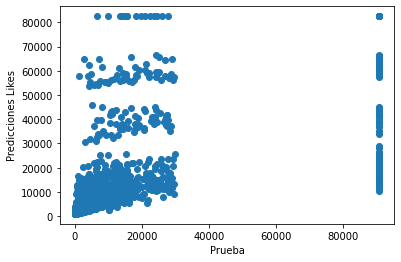

In [65]:
X = videos[['views','comment_count']]
y = videos['likes']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=2000, random_state=101)
lm = LinearRegression()
lm.fit(X_train,y_train)
preds = lm.predict(X_test)
plt.scatter(y_test, preds)
plt.xlabel('Prueba')
plt.ylabel('Predicciones Likes')
plt.show()

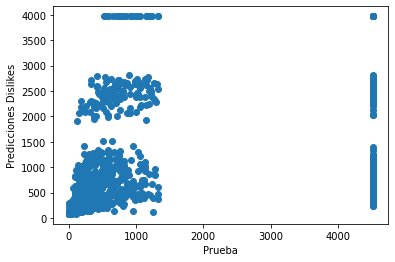

In [66]:
X = videos[['views','comment_count']]
y = videos['dislikes']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=2000, random_state=101)
lm = LinearRegression()
lm.fit(X_train,y_train)
preds = lm.predict(X_test)
plt.scatter(y_test, preds)
plt.xlabel('Prueba')
plt.ylabel('Predicciones Dislikes')
plt.show()